# Segmented Projection of Structures in the Isocortex, Horizontal view

In [4]:
import numpy as np
import os
import functools
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from allensdk.core.reference_space import ReferenceSpace
from allensdk.core.reference_space_cache import ReferenceSpaceCache

### AllenSDK manipulations

In [7]:
reference_space_key = 'annotation/ccf_2017'
resolution = 25 #Microns
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest='manifest.json')
tree = rspc.get_structure_tree(structure_graph_id=1) #Trees are useful for identification of structures and hierarchy
annotation, meta = rspc.get_annotation_volume() #It downloads the annotation volume to your hard drive
print(os.listdir(reference_space_key)) #Confirms the file is in the directory if printed
rsp = rspc.get_reference_space()
name_map = tree.get_name_map() #Dictionnary of names to IDs

['annotation_25.nrrd']


#### (Optional section) Name and IDs of every principal structure in Isocortex

In [8]:
isocortex_areas_names = ["Frontal pole, cerebral cortex", "Somatomotor areas", "Somatosensory areas", "Gustatory areas", \
                        "Visceral area", "Auditory areas", "Visual areas", "Anterior cingulate area", "Prelimbic area", "Infralimbic area", \
                        "Orbital area", "Agranular insular area", "Retrosplenial area","Posterior parietal association areas","Perirhinal area","Ectorhinal area"]
isocortex_areas_IDs = []
for i in range(len(isocortex_areas_names)):
    isocortex_areas_IDs.append(tree.get_structures_by_name([isocortex_areas_names[i]])[0].get('id'))


for i in isocortex_areas_IDs: #Tests if every area_ID is in Isocortex
    structure_id_a = 312782608
    structure_id_b = 315 #Isocortex ID
    
    if not tree.structure_descends_from(structure_id_a, structure_id_b): #Prints which structure is not in structure B
        print(f"{structure_id_a} is not in {structure_id_b}.")

### Cortical Map Generation

In [43]:
#empty_matrix = np.zeros((528,456)) #dtype=int8 pour couleurs


#for slice in tqdm(range(7987)):
#    position = int(np.around(slice / rsp.resolution[1]))
#    image = np.squeeze(rsp.annotation.take([position], axis=1)) #Image is structure id map <3
#    np.copyto(empty_matrix, image,where=empty_matrix==0)
    
    #if slice%200 == 0:
        #fig, ax = plt.subplots(figsize=(10, 10))
        #plt.imshow(empty_matrix, interpolation = 'none',vmax=1300)
        #plt.show()
#fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(empty_matrix, interpolation = 'none',vmax=1300)
#plt.show()


#Vieille version qui prennait des frames redondants

100%|███████████████████████████████████████| 320/320 [00:00<00:00, 1811.90it/s]


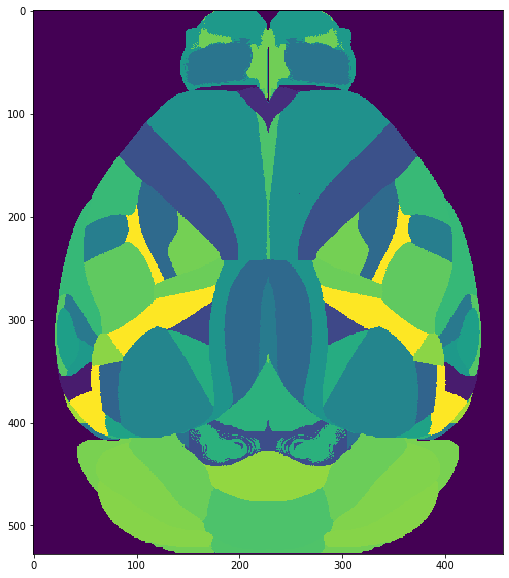

In [39]:
empty_matrix = np.zeros((528,456)) #dtype=int8 pour couleurs


for slice in tqdm(range(A.shape[2])):
    #position = int(np.around(slice / rsp.resolution[1]))
    #print(position)
    image = np.squeeze(rsp.annotation.take([slice], axis=1)) #Image is structure id map <3
    
    np.copyto(empty_matrix, image,where=empty_matrix==0)
    
    #if slice%200 == 0:
        #fig, ax = plt.subplots(figsize=(10, 10))
        #plt.imshow(empty_matrix, interpolation = 'none',vmax=1300)
        #plt.show()
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(empty_matrix, interpolation = 'none',vmax=1300)
plt.show()

In [62]:
id_list = np.unique(empty_matrix)[1:].astype(int)
print(id_list)

[       68        97       171       281       313       320       421
       442       450       482       484       507       512       526
       527       542       558       593       656       671       696
       698       735       750       805       820       828       834
       836       843       851       873       878       897       935
       936       944       949       959       981       997      1006
      1007      1016      1025      1030      1041      1049      1056
      1064      1074      1091      1121 182305693 312782550 312782578
 312782604 312782632]


In [63]:
remove_id =[]
keep_id = []
for id in id_list:
    if not tree.structure_descends_from(id, 315):
        remove_id.append(id)
    else:
        keep_id.append(id)

In [64]:
iso_sections = np.copy(empty_matrix)

In [14]:
for id in remove_id:
    iso_sections = np.where(iso_sections==id, 0, iso_sections) # Isocortex map, segmented by ID.

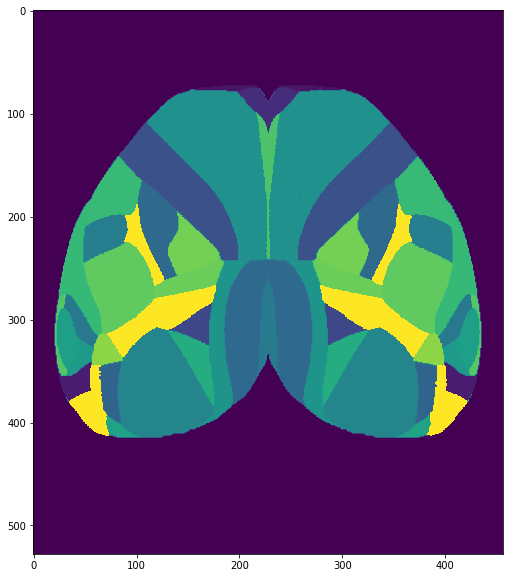

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(iso_sections,vmax=1300)
plt.show()

In [72]:
print(iso_sections[100,160])
print(name_map[656])
print(name_map.items())

656.0
Secondary motor area, layer 1
dict_items([(997, 'root'), (8, 'Basic cell groups and regions'), (567, 'Cerebrum'), (688, 'Cerebral cortex'), (695, 'Cortical plate'), (315, 'Isocortex'), (184, 'Frontal pole, cerebral cortex'), (68, 'Frontal pole, layer 1'), (667, 'Frontal pole, layer 2/3'), (526157192, 'Frontal pole, layer 5'), (526157196, 'Frontal pole, layer 6a'), (526322264, 'Frontal pole, layer 6b'), (500, 'Somatomotor areas'), (107, 'Somatomotor areas, Layer 1'), (219, 'Somatomotor areas, Layer 2/3'), (299, 'Somatomotor areas, Layer 5'), (644, 'Somatomotor areas, Layer 6a'), (947, 'Somatomotor areas, Layer 6b'), (985, 'Primary motor area'), (320, 'Primary motor area, Layer 1'), (943, 'Primary motor area, Layer 2/3'), (648, 'Primary motor area, Layer 5'), (844, 'Primary motor area, Layer 6a'), (882, 'Primary motor area, Layer 6b'), (993, 'Secondary motor area'), (656, 'Secondary motor area, layer 1'), (962, 'Secondary motor area, layer 2/3'), (767, 'Secondary motor area, layer 

In [17]:
def create_mask(structure_array, id):
    return np.where(structure_array==id, 1, 0)

#### Test

1


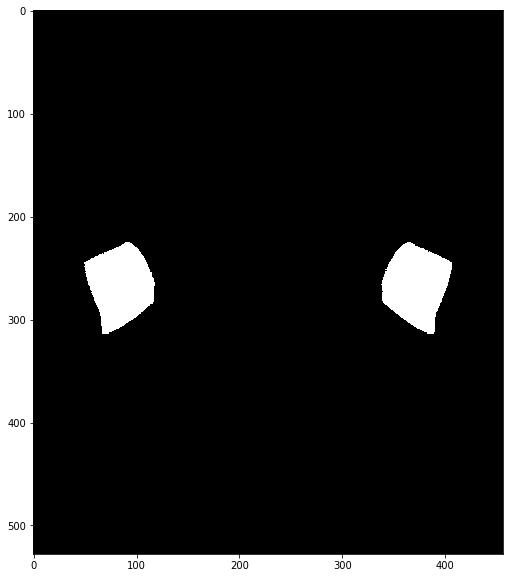

In [18]:
A = create_mask(iso_sections, 981)
print(np.max(A))
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(A, interpolation = 'none',cmap="binary_r")
plt.show()

### Create and show (optionnal) every mask

In [21]:
for id in keep_id:
    A = create_mask(iso_sections,id)
    #fig, ax = plt.subplots(figsize=(10, 10))
    #plt.imshow(A, interpolation = 'none',cmap="binary_r")
    #plt.show()

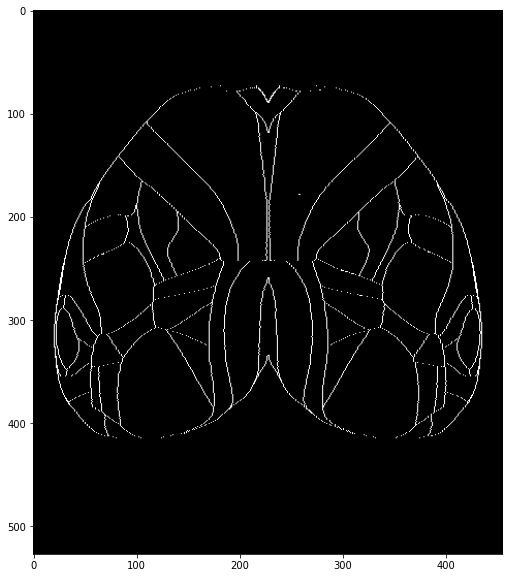

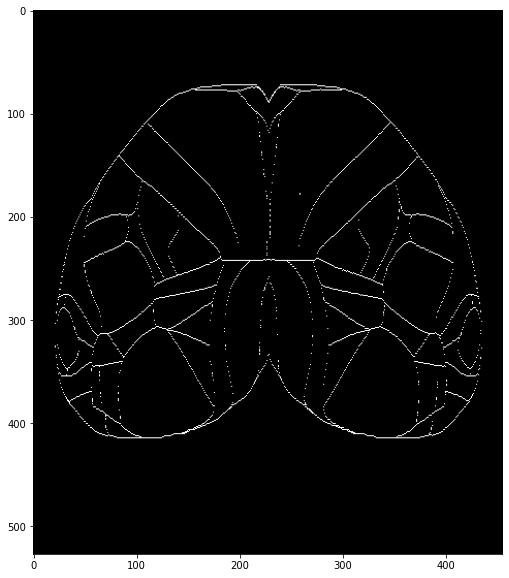

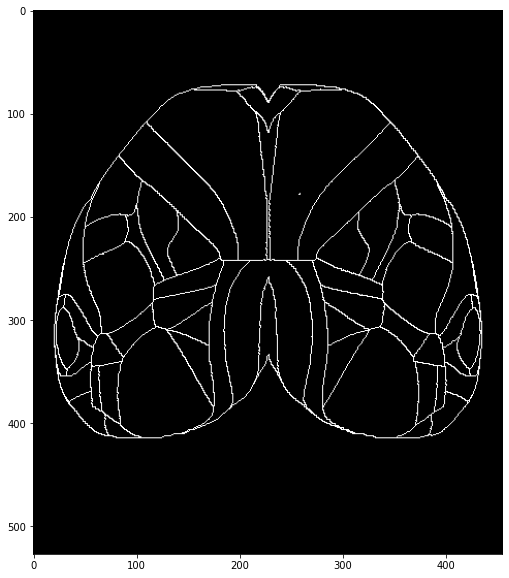

In [220]:
contours_h = abs(np.diff(iso_sections))[:-1] #Méthode boboche pour créer des contours (wtf j'écris en francais)
contours_v = abs(np.diff(iso_sections, axis=0))[:, :-1]
contours = contours_h + contours_v
norm_contours = np.where(contours!=0, 1, 0)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(np.where(contours_h!=0,1,0), cmap="binary_r")
plt.show()
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(np.where(contours_v!=0,1,0), cmap="binary_r")
plt.show()
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(norm_contours, cmap="binary_r")
plt.show()

In [234]:
def contour(structure): #Contours in horizontal (h) and vertical (v) planes. contours are sum of both, and returns boolean (normalized to 1).
    contours_h = abs(np.diff(structure))
    contours_v = abs(np.diff(structure, axis=0))
    contour_h = np.concatenate((contours_h, np.zeros((len(contours_h),1))),axis=1)
    print(contour_h.shape)
    contour_v = np.concatenate((contours_v, np.zeros((1,len(contours_v[0])))))
    contours = contour_h + contour_v
    return np.where(contours!=0, 1, 0)

#### mask_981 = create_mask(iso_sections, 981)

(528, 456)


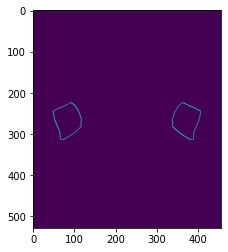

In [237]:
contour_981 = contour(mask_981)
plt.imshow(contour_981)

In [232]:
name2id_dict = {}
for id in keep_id:
    name2id_dict[name_map[id]] = id
id2name_dict = {v: k for k, v in name2id_dict.items()}